# <img src="numpy.png" width="450">   

<br>

# The NumPy.random package
[Official Documentation](https://numpy.org/doc/stable/reference/random/index.html) [5]
***

<br>

## Assignment Objectives
- Explain the overall purpose of the numpy.random package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers.

<br>

### Overall purpose of the package
***

#### numpy (Version 1.21)
NumPy (Numerical Python) is a very popular open source library comprised of multidimensional array objects, mathematical functions, linear algebra<br>
routines, random number generators and more [1]. The library is very popular due to its high level syntax and ability to perform rapid data operations.<br>
One can explain the speed by looking deeper at how the package operates. Data structures known as ndarrays (N-dimensional arrays) only accept data of<br>
the same type and then map these data structured to highly optimised C compiled code [2]. As Soklaski 2020 describes, this process of vectorization is<br>
so effective when compared to iterating lists and tuples as the ndarrays dont have to check every elements data-type on iteration, resulting in a process<br>
that is orders of magniture faster.<br> 

NumPy's operational speed and diversity of mathematical functions make the package of great utility for tasks that involve numerical processing on large<br>
datasets, such as Machine Learning. The package also provides a very useful module for generating random numbers that will now be explored, a package<br>
named *numpy.random*.

<br>

#### numpy.random

This sub-module has the ability to produce pseudo-random sequences and model chosen statistical distribtions, which can be powerful when applied to data<br>
science or machine learning applications. Considering that certain real world phenomena follow predictable distibutions when the sample size is of sufficient<br> 
scale, one can generate a model and make predictons. An example of this would be modelling population as a *normal distribtuion* (bell-curve shape) and using<br> 
this model to make predictions on real-world data.

As per the offical documnetation the random sub-module functions can be categorized into the following: <br>
- *Simple random data* functions that can generate pseudo-random data arrays. 
- *Permutations* function that are used to randomly modify a sequence.
- *Distribution* functions that use randomly generated arrays to sample from a chosen statistical distribtuion.<br>

<br>

### Simple random data
***
As per the offical documentation, the approach of numPy V1.21 to generating random numbers consists of using a *BitGenerators* and a *random generator*.<br> 
The BitGenerators produces an array of random bits which which are passed to a generator, which can be used to model different probability distributions.<br>
One can call the *default_rng()* constructor to instansiate an object of the Generator Class and then apply *simple random data* functions that belong to the class.<br> Before exploring this further lets import the relevant libraries and define histogram functions for future use.

In [1]:
# import libraries
%matplotlib inline
import numpy as np           
import pandas as pd
import matplotlib.pyplot as plt 
import statistics

# Construct new Generator and store in rng variable
# Uses default BitGenerator (PCG64)
rng = np.random.default_rng()

In [2]:
def plot_hist(array, y_label, title, bin_num, fig_ref):
    
    plt.hist(array, density = True, bins = bin_num)     
    plt.title(title)  
    plt.figtext(0.5, 0.01, fig_ref, wrap=True, horizontalalignment = 'center', fontsize = 15)  
    #plt.xlabel('Data')  
    plt.ylabel(y_label)
    plt.figure(figsize=(8,8),facecolor='red',edgecolor='blue')
    plt.tight_layout(pad = 2)
    
    plt.show()

In [3]:
def plot_hist_twice(array_one, array_two, title_one, title_two, fig_ref):
    
    fig, axs = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (8, 5))
    axs[0].hist(array_one, density = False, bins = 30, rwidth = 10)
    axs[1].hist(array_two, density = False, bins = 30, rwidth = 10)
    
    plt.figtext(0.5, 0.0, fig_ref, wrap=True, horizontalalignment = 'center', fontsize = 15)   
        
    # loop over axes objects in the figure object.. why not
    
    for plot_index, ax in enumerate(fig.axes):          
        ax.set_xlabel('data range')   
        ax.set_facecolor('silver')
 
        if plot_index < 1:     
            ax.set_title(str(title_one))  
            ax.set_ylabel('count')
        else:     
            ax.set_title(str(title_two))  
     
    fig.tight_layout(pad = 2)
    plt.show()

<br>

#### Random Generator Functions

This version of NumPy recommends two random number generating functions that can be utilised when one accesses the Generator via<br>
*np.random.default_rng()*. Both functions produce random numbers from the uniform distribution. In other words, all outcomes are equally likely and can<br> produce a symmetric probability distribution when the sample size sufficient scale, see the two functions below.

- ***generator.integers()*** <br>
Produces random integers from a "discrete" uniform distribution. This means that any symmetric probability distriubtion has a finite number of<br>
values [7]. This makes sense as the function produces whole numbers. See *Figure 1* below and the code used to generate the histogram to see the uniformity<br> of the distribution and how it increases with a larger sample size.<br><br>
- ***generator.random()*** <br>
Produces random floating point numbers from a “continuous" uniform distribution, i.e : any symmetric probability distriubtion has an infinite number of<br> possible values [7]. This also makes sense as the function can produce an infinite range of numbers (floats).

                             data type check :int64


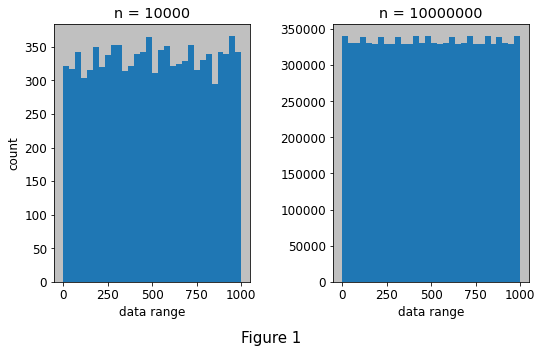

In [151]:
# generator.integers function
# syntax: Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

# Call integers function on generator and pass n values  
# of range 0 (inclusive) to 1001 (exclusive) and dtype int64    
small_array = rng.integers(1001, size = 10000)     
large_array = rng.integers(1001, size = 10000000)   

# check data type
print(' '*28, 'data type check :' + str(small_array.dtype))

# Pass variables to hist function
plot_hist_twice(small_array, large_array, 'n = 10000', 'n = 10000000', 'Figure 1')

<br>

#### Choice Function
This function can:
- Create a random array similar to the *np.arange()* function.
- Generate or selects a random sample from a given 1-darray or list. As per the documentation the choice method samples from a uniform distribution, however
<br>one can pass a probability list / array to alter this distribution (Reference Figure 2).

In [5]:
# randomly select 10 numbers between 0 - 10
rand_array = rng.choice(11, size = 10)     # acts like np.arange(n)
rand_array 

array([ 0,  6,  9,  0, 10,  3,  3,  7,  6,  4], dtype=int64)

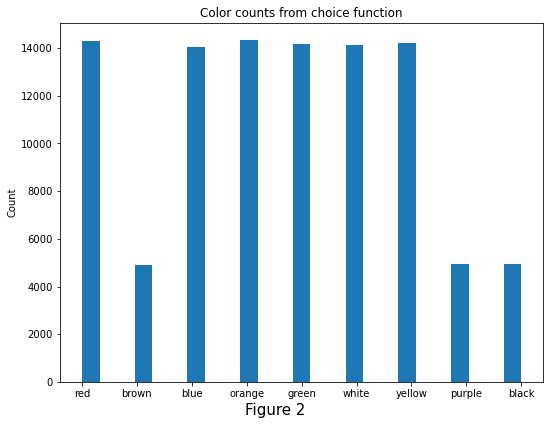

In [6]:
# This cell will explore the choice methods ability to sample from a uniform distribution
# and its p (probability) parameter

colors = ['blue', 'black', 'green', 'red', 'yellow', 'orange', 'purple', 'brown', 'white']
selections = []
selections_weighted = []
probabilities = []

# append choices from color list to selections list
for i in range(10000):
    selection = rng.choice(colors) 
    selections.append(selection)
    
 
    # make weighted proability list 
for color in colors:
    if color in ['black', 'brown', 'purple']:
        probabilities.append(0.05)
    else:
        probabilities.append(0.85/6)
        
    # make choices over large range
for i in range(100000):
    selection_weighted = rng.choice(colors, p = probabilities)      # pass weighted probability list to choice()  
    selections_weighted.append(selection_weighted)                  # append choices to weighted list

# plot hisrogram 
plt.figure(figsize = (8, 6))
plt.hist(selections_weighted, bins = 25)     
plt.figtext(0.5, 0.01, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15)  
plt.title('Color counts from choice function')  
plt.xticks(colors)
plt.ylabel('Count')
plt.tight_layout(pad = 2)
plt.show()

Figure 2 Shows a uniform distribution for blue, green, red, yellow, orange, white. One can see the choice method selected black, brown and purple less <br>
frequently as 
each item had a probability of circa 5% (0.05 in code), despite being uniformly selected relative to eachother.





<br>

### Pemutation Functions
When dealing with ndarrays, one can think of a permutation as any possible arrangment of the elements in that array [8]. NumPy offers three different <br>
permutation functions that can randomly re-arrange the element sequence of the given array, these functions will be explored in more detail below. <br>

<br>

**Some uses in Machine Learning:**   
1. Shuffling can be used to reduce the variance and prevent a given model from learning irrelevant noise through its training dataset which would in turn effects<br>
its ability to accurately predict new data (overfitting)[9]. Calomme 2017 describes how in a in regular stochastic gradient descent one should shuffle their<br>
data after each epoch to keep model learning without selection bias. <br> <br>
2. In a Machine Learning model feature importance is of great interest as it informs the data scientist what features have the greatest impact on a models ability<br>
to make accurate predictions. One can deduce information on features importance by randomly shuffling selected selected values and observing the new predicitions of<br>
the model relative to its original prediction. Billiau 2021 describes how a small decrease in model accuracy suggests that the shuffled data are not contributing<br>
heavily to your models ability to predict outcomes. The process can be very useful when correctly applied accross all features as one can now rank order the featues<br>
by importance.

In [7]:
# template array
array = np.arange(15).reshape((3, 5))
print('Template Array')
print(array)

# axis = 0 shuffles rows
# axies =1 shuffles columns

# shuffle template along rows 
rng.shuffle(array, axis = 0)                     
print('\nShuffled sub arrays along rows (axis = 0)  \nInplace always True')
print(array)


# define new array and shuffle along columns
array = np.arange(15).reshape((3, 5))                                             
array_cols_permutation = rng.permutation(array, axis = 1)
print('\nPermutation of sub arrays along cols (axis = 1)  \nGenerates Copy')
print(array_cols_permutation)


# template passed to permuted function 
array_permuted = rng.permuted(array, axis = 0)  
print('\nPermuted Array \nEach slice of rows shuffled independantly')
print(array_permuted)

Template Array
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Shuffled sub arrays along rows (axis = 0)  
Inplace always True
[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]]

Permutation of sub arrays along cols (axis = 1)  
Generates Copy
[[ 0  2  1  4  3]
 [ 5  7  6  9  8]
 [10 12 11 14 13]]

Permuted Array 
Each slice of rows shuffled independantly
[[ 5  1  2  8  4]
 [ 0  6  7  3  9]
 [10 11 12 13 14]]


<br>

### Probability Distributions
A probability distribution is a function that describes all of the possible outcomes of a random variable along with their corresponding probability values [13]. The numPy package<br>
provides a range of subroutines that can model important statistical distributions. These subroutines can be accessed by calling the default_rng() constructor to instansiate an object<br>
of the Generator Class and calling the distribution subroutine on the object. 

The ability to sample random data from chosen distribution is of great benifit as one can model different scenarios if they have information on the distribution subroutine input<br> 
parameters. The ease of access to probability distributions allows one to predict or calculate the probabilies of defined outcomes. Onnen, 2021 describes how data scientists can utilise<br>
these distributions to help join the dots of the 3-point-estimation technique to avoid business pitfalls, i.e: model the best case, likely case and worst case to help describe possible<br>
outcomes with their associated probabilities. 


Brooks-Bartlett 2018 breaks down the different types of probability predictor functions into:
- Probability Mass Function (PMF): Represents discrete probability distributions and can calculate probability of an outcome.
- Probability Density Function (PDF): Represents continuous probability distributions and can calculate probability over a range by integrating the area under a curve.

These functions will be used to test some of the probability distributions that are offered by numPy.


#### Uniform distribution

##### Function Usage
*Syntax: random.Generator.uniform(low = 0.0, high = 1.0, size = None)* <br>

This function draw random samples from a uniform distribution. It accepts 3 parameters:
- *low*: lower boundary of output interval (inclusive).
- *high*: upper value of output interval (exclusive)
- *size*: Shape of output array (number of dimensions * number of samples drawn (exclusive))

<br>

##### Probability Density Function
<h3>PDF (normal): &nbsp;  $P(x)=\frac{1}{b - a}$ <h3>

##### Distribution Description

....

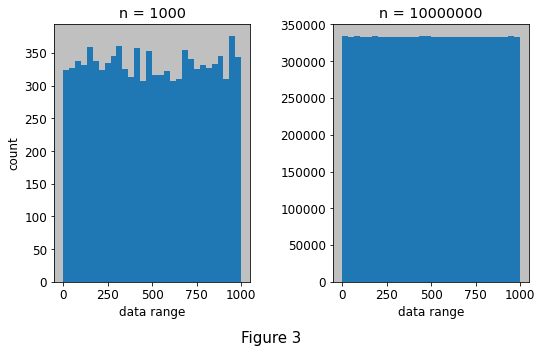

In [152]:
#### Uniform
# Uniform distriubtion function
s_small = rng.uniform(0, 1000, 10000)
s_large = rng.uniform(0, 1000, 10000000)
plot_hist_twice(s_small, s_large, 'n = 1000', 'n = 10000000', 'Figure 3')

##### Modelling Real World Data

<br>

#### Normal distribution 
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)

##### Function Usage
*Syntax: random.Generator.normal(loc = 0.0, scale = 1.0, size = None)* <br>

This function draw random samples from a Guassian (normal) distribution. It accepts 3 parameters:
- *loc*: this is the mean or centre of the normal distribution.
- *scale*: this is the standard deviation or spread of the distribution.
- *size*: Shape of output array (number of dimensions * number of samples drawn (exclusive))

##### Distribution Description
The shape of the distribution resembles that of a bell shape curve and as per Barai 2020, some of its key chracteristics include: <br>

- Continuous  distribution, one local maximum in centre of distribution where the variables spread evenly from this mode.<br>
- Symmetric about the mean, whereby a perfect normal distribution has the same mean, median and mode (this will be explored later).
- The Standard Normal Distribution (mean = 0, standard deviation = 1) has defined data spread:
    - 68.3 % of data falls withing one std devs of the mean
    - 99.7 %  of data falls withing three std devs of the mean

The normal distribution can be described by its mean and standard deviation, whereby the probability of being selected rises as you approach the mean and spread increases<br>
with standard deviation, thereby effecting the heaviness of the distribution tails (kurtosis)[15]. See *Figure 4* below for exploration of how the standard normal distribution<br>
changes with different mean and std dev values,  

<br>

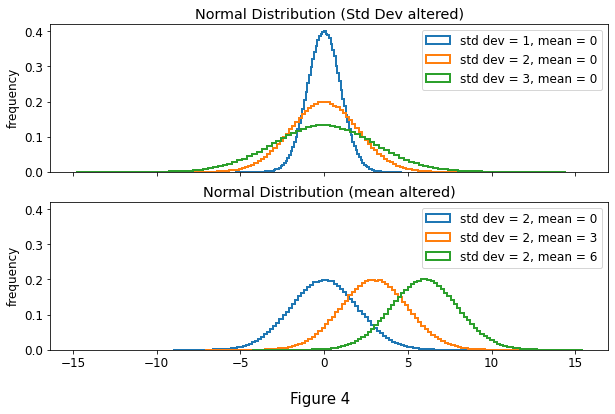

In [153]:
def plot_normal_distributions(axis_check, mean, std_dev):
    # pass mean, std dev and number of runs into generator.normal function
    normal_array = rng.normal(mean, std_dev, 1000000)      
    
    if axis_check == 'axis_1':
        ax1.hist(normal_array, bins = 100, histtype = 'step', linewidth = 2.0, 
                    label = "std dev = " + str(std_dev) + ", mean = " + str(mean), density = True) 
        
        ax1.set_title('Normal Distribution (Std Dev altered)')
        ax1.set_ylabel('frequency')
        ax1.legend(loc='upper right')
        
    else:
        ax2.hist(normal_array, bins = 100, histtype = 'step', linewidth = 2.0, 
                    label = "std dev = " + str(std_dev) + ", mean = " + str(mean), density = True) 
        
        ax2.set_title('Normal Distribution (mean altered)')
        ax2.set_ylabel('frequency')
        ax2.legend(loc='upper right')

# generate 2 subpots and pass axis_check, mean and std dev to plotting function        
Fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (10, 6))
plt.figtext(0.5, 0.0, 'Figure 4', wrap = True, horizontalalignment = 'center', fontsize = 15)

plot_normal_distributions('axis_1', mean = 0, std_dev = 1)
plot_normal_distributions('axis_1', mean = 0, std_dev = 2)
plot_normal_distributions('axis_1', mean = 0, std_dev = 3)
plot_normal_distributions('axis_2', mean = 0, std_dev = 2)
plot_normal_distributions('axis_2', mean = 3, std_dev = 2)
plot_normal_distributions('axis_2', mean = 6, std_dev = 2)

plt.show()


<br>

##### Probability Density Function

The numPy normal generator will now be used to generate a standard normal distribution array which will be plotted. The array will be plotted on a histogram <br>
and each bin (x data point) will be passed as a paramater to the normal proability distribution function to yield the corresponding y data point and eventually a lineplot.<br>
The closeness of the mean, median and mode will also be confirmed.


<h3>PDF (normal): &nbsp;  $P(x)=\frac{1}{\sqrt{2πσ^2}}{e^\frac{(x-µ)^2}{2σ^2}}$ <h3>


           This plot shows that the data generated by the np.normal distribution
           function aligns with the data generated by the probability density
           function for a Gaussian distribution. Also the input values for the
           mean & std dev (0, 1) closely resemble the output values in the
           generated array showing an accuracy of 0.1 - 0.2 %



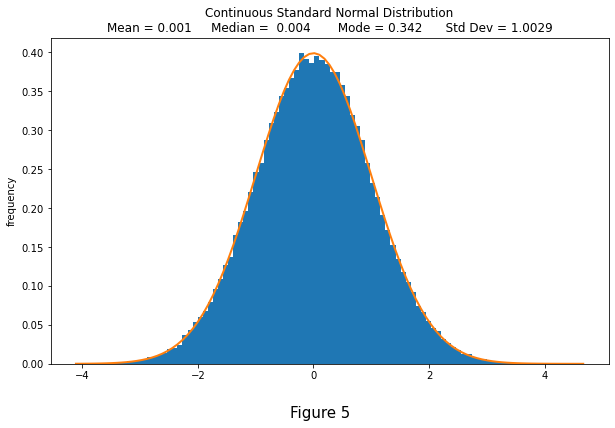

In [10]:
# plot Continuous Standard Normal Distribution 
# define variables
mean = 0
std_dev = 1

# generate normal array 
normal_array = np.random.normal(mean, std_dev, 100000)

# plot histogram given normal array 
fig, ax = plt.subplots(figsize = (10, 6))
count, bins, ignored = plt.hist(normal_array, 100, density = True)
plt.figtext(0.5, 0.0, 'Figure 5', wrap=True, horizontalalignment = 'center', fontsize = 15) 

# define probability density function (equation shown in PDF1 below)
f = 1/(std_dev * np.sqrt(2 * np.pi)) * np.exp(-(bins - mean)**2/(2 * std_dev**2))

# calc 3x stats for normal curve
mean = round(statistics.mean(normal_array), 3)
median = round(statistics.median(normal_array), 3)
mode = round(statistics.mode(normal_array), 3)
std_dev = round(np.std(normal_array), 4)

# plot probability density line
plt.plot(bins, f, linewidth = 2);                     
plt.ylabel('frequency');    
plt.title('Continuous Standard Normal Distribution\nMean = {}     Median =  {}       Mode = {}      Std Dev = {}'.format(mean, median, mode, std_dev)); 

# description for plot
string_spacer = [' ' * 11 for i in range(6)]
print('\n{}This plot shows that the data generated by the np.normal distribution\n\
{}function aligns with the data generated by the probability density\n\
{}function for a Gaussian distribution. Also the input values for the\n\
{}mean & std dev (0, 1) closely resemble the output values in the\n\
{}generated array showing an accuracy of 0.1 - 0.2 %\n'.format(*string_spacer))    # add comment about random variability 


##### Modelling Real World Data

The Normal distribution is considered one of the most important of the probability distributions in statistics. This distribution occurs in many real wold phenomena such as age,<br>
height, test-scores, IQ scores, men's height etc. Sharma (2019) helps explain this by describing how larger data sets with finite variances and independent feature probabilities<br>
will have a data distribution that favours the bell curve shape [11]. 

The numPy normal function will now be used to model men's height and the results will be compared to that of a real world dataset. The mean and standard deviation parameters that<br>
will be passed into the normal function will be obtained from the dataset. 


In [11]:
# read in mens height data to numpy array
# url reference to zip file: https://www.kaggle.com/mustafaali96/weight-height/download

read_path = r'numpy_data_sets\weight-height.csv'             # define read path for real world data
df = pd.read_csv(read_path)                                  # read in csv file
df = df.loc[df.loc[:, 'Gender'] == 'Male']                   # filter gender by male
male_heights = df['Height']                                  # isolate height column
male_height_mean = np.mean(male_heights)                  # calc mean for normal plot
male_height_std_dev = np.std(male_heights)                # calc std dev for normal plot

print('Average male heights in inches = {}'.format(round(male_height_mean, 2)))
print('Std Dev. of male heights = {}'.format(round(male_height_std_dev, 2)))
print('Observiations = {}'.format(len(male_heights)))


Average male heights in inches = 69.03
Std Dev. of male heights = 2.86
Observiations = 5000


In [98]:
# Draw random samples from a normal (Gaussian) distribution passing the mean
# and std dev. from the real world dataset along with the same number of records
normal_array = np.random.normal(male_height_mean, male_height_std_dev, 5000)      



           Both plots show skew & kurtosis values close to zero showing how
           normal both distributions are. Interestingly the real world world
           data values deviate further from zero than the numpy data which 
           makes sense as the normal package samples from a normal distribution
           and the real world data tends towards a normal distribution. The real
           world data shows a more negative skew as slightly more data is
           concentrated on right hand side. The kurtosis of the real world
           sample is slightly positive as the tails contain slightly more
           data than that of a perfectly normal distribution.



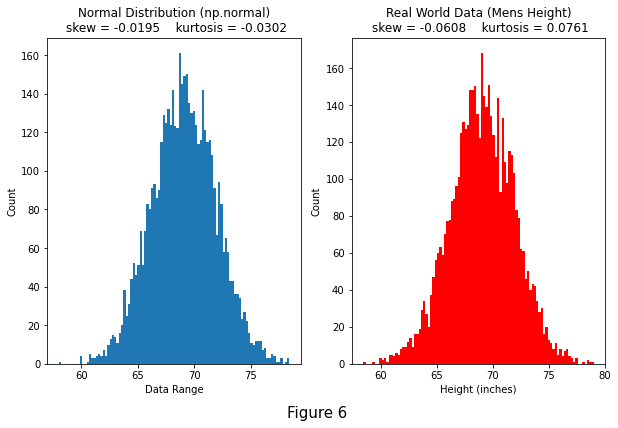

In [13]:
## convert normal array to pandas series
normal_series = pd.Series(normal_array)                            

# calc skew & kurtosis for numpy and real world array
normal_skew = round(normal_series.skew(), 4)
normal_kurtosis = round(normal_series.kurtosis(), 4)
male_heights_skew = round(male_heights.skew(), 4) 
male_heights_kurtosis = round(male_heights.kurtosis(), 4)

# make 1x2 subplot to compare histograms of np.normal vs real world data
Fig, (ax1, ax2) = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (10, 6))
plt.figtext(0.5, 0, 'Figure 6', wrap = True, horizontalalignment = 'center', fontsize = 15); 

ax1.hist(normal_array, bins = 100, linewidth = 2.0, density = False) 
ax2.hist(male_heights, bins = 100, linewidth = 2.0, density = False,  color = "red") 

ax1.set_xlabel('Data Range')
ax1.set_ylabel('Count')
ax1.set_title('Normal Distribution (np.normal)\n skew = {}    kurtosis = {}'
              .format(normal_skew, normal_kurtosis))

ax2.set_xlabel('Height (inches)')
ax2.set_ylabel('Count')
ax2.set_title('Real World Data (Mens Height)\n skew = {}    kurtosis = {}'
              .format(male_heights_skew, male_heights_kurtosis))

# description for plot
string_spacer = [' ' * 11 for i in range(9)]
print('\n{}Both plots show skew & kurtosis values close to zero showing how\n\
{}normal both distributions are. Interestingly the real world world\n\
{}data values deviate further from zero than the numpy data which \n\
{}makes sense as the normal package samples from a normal distribution\n\
{}and the real world data tends towards a normal distribution. The real\n\
{}world data shows a more negative skew as slightly more data is\n\
{}concentrated on right hand side. The kurtosis of the real world\n\
{}sample is slightly positive as the tails contain slightly more\n\
{}data than that of a perfectly normal distribution.\n'.format(*string_spacer))

<br>
<br>
<br>


**Talk about importance of larger datasets for formation of uniform distribution** <br>
**Talk about  <br>

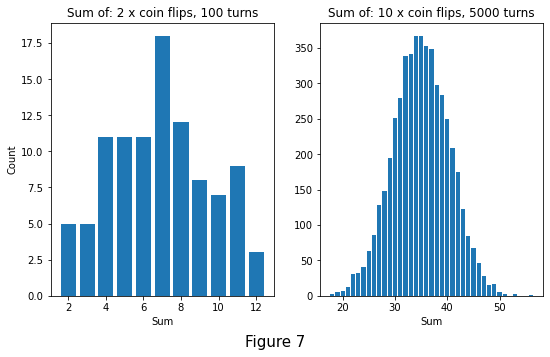

In [14]:
def plot_bar_twice(roll_low, roll_high):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,5))
    ax1.bar(roll_low[0], roll_low[1])
    ax2.bar(roll_high[0], roll_high[1])
    
    ax1.set_title('Sum of: 2 x coin flips, 100 turns')
    ax1.set_xlabel('Sum')
    ax1.set_ylabel('Count')
    ax2.set_title('Sum of: 10 x coin flips, 5000 turns')
    ax2.set_xlabel('Sum')
    plt.figtext(0.5, 0, 'Figure 7', wrap = True, horizontalalignment = 'center', fontsize = 15)  
    plt.tight_layout(pad = 2)
    plt.show()

def sum_dice_rolls(num_dice, num_turns):
    dice = rng.integers(1, 7, (num_turns, num_dice))
    totals = np.sum(dice, axis = 1)
    faces, counts = np.unique(totals, return_counts = True)        # unique count to faces variable
    return faces, counts ,num_dice, num_turns                      # return tuple for each array

less_coin_flips = sum_dice_rolls(num_dice = 2, num_turns = 100)
more_coun_flips = sum_dice_rolls(num_dice = 10, num_turns = 5000)
plot_bar_twice(less_coin_flips, more_coun_flips)

#### Binomial
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)

##### Function Usage
Syntax: random.Generator.binomial(n, p, size=None)

This function draw random samples from a binomial  distribution. It accepts 3 parameters:
- *n*: this is the number of trials.
- *p*: this is the probability of success for each trial.
- *size*: Shape of output array (number of dimensions * number of samples drawn (exclusive))


##### Distribution Description

This is a discrete distribution made up of a collection of Bernoulli events, i.e a collection of binary events where each event has two modes (failure and success). The distribution models<br>
the successes based on the number of trials ran and the probability (p) of individual event success. Peng 2020 highlights how the the individual events are independent from one another where<br>
the results of next event are not effected by the previous event, this is due to the model resamping on successive trials.

As demonstrated in *Figure 7* below the shape of the distribution alters with the number of trials ran and the probability of trial success. When the trial count is of sufficient scale the distribution<br> appears as a left skewed bell curve when p <0.5 and a right skewed bell curve when p >0.5. A normal bell curve shape is obtaiend when:
- The number of trials ran is large.
- The probability of success is close to 0.5.

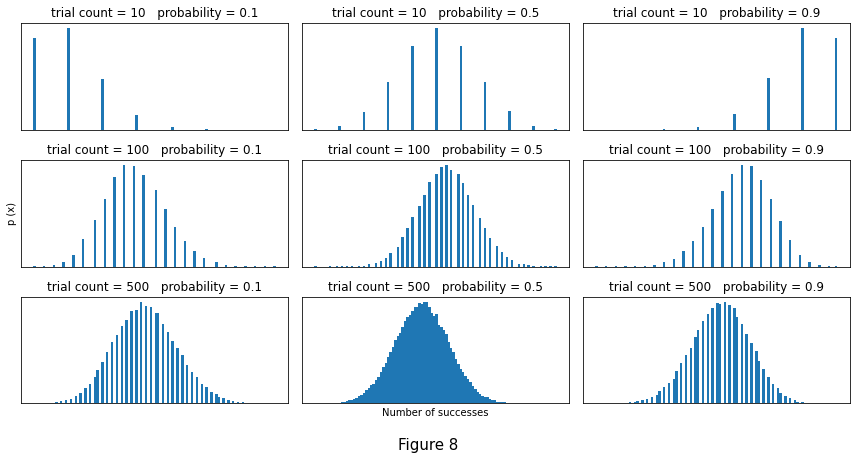

In [15]:
def plot_binomial_array(subplot_ref, trial_num, p):
    array = rng.binomial(trial_num, p, 100000)
    axs[subplot_ref].hist(array, bins = 100)
    axs[subplot_ref].title.set_text('trial count = {}   probability = {}'.format(trial_num, p))
    axs[subplot_ref].set_xticks([])
    axs[subplot_ref].set_yticks([])

Fig, axs = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (12, 6))
plt.figtext(0.5, -0.05, 'Figure 8', wrap = True, horizontalalignment = 'center', fontsize = 15)
axs[2, 1].set_xlabel('Number of successes')        
axs[1, 0].set_ylabel('p (x)')   

plot_binomial_array((0, 0), trial_num = 10, p = 0.1)
plot_binomial_array((0, 1), trial_num = 10, p = 0.5)
plot_binomial_array((0, 2), trial_num = 10, p = 0.9)

plot_binomial_array((1, 0), trial_num = 100, p = 0.1)
plot_binomial_array((1, 1), trial_num = 100, p = 0.5)
plot_binomial_array((1, 2), trial_num = 100, p = 0.9)

plot_binomial_array((2, 0), trial_num = 500, p = 0.1)
plot_binomial_array((2, 1), trial_num = 500, p = 0.5)
plot_binomial_array((2, 2), trial_num = 500, p = 0.9)

plt.tight_layout()


In [16]:
''' FOR TRIAL
#fig, axes = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (15, 6))
fig, ax = plt.subplots(sharex = False, sharey = False, figsize = (15, 6))
trial_num_tuple = (10, 10 ,10, 100, 100 ,100, 500 ,500 ,500)
probability_tuple = (0.1, 0.5 ,0.9, 0.1, 0.5 ,0.9, 0.1, 0.5 ,0.9)
column_list = ['tlow_plow', 'tlow_pmedium', 'tlow_high',
               'tmedium_plow', 'tmedium_pmedium', 'tmedium_high', 
               'thigh_plow', 'thigh_pmedium', 'thigh_high']

array = rng.binomial(trial_num_tuple,  probability_tuple, (100000, 9))
df = pd.DataFrame(array, columns = column_list)

sns.kdeplot(data = df, x = 'tlow_high')
'''

" FOR TRIAL\n#fig, axes = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (15, 6))\nfig, ax = plt.subplots(sharex = False, sharey = False, figsize = (15, 6))\ntrial_num_tuple = (10, 10 ,10, 100, 100 ,100, 500 ,500 ,500)\nprobability_tuple = (0.1, 0.5 ,0.9, 0.1, 0.5 ,0.9, 0.1, 0.5 ,0.9)\ncolumn_list = ['tlow_plow', 'tlow_pmedium', 'tlow_high',\n               'tmedium_plow', 'tmedium_pmedium', 'tmedium_high', \n               'thigh_plow', 'thigh_pmedium', 'thigh_high']\n\narray = rng.binomial(trial_num_tuple,  probability_tuple, (100000, 9))\ndf = pd.DataFrame(array, columns = column_list)\n\nsns.kdeplot(data = df, x = 'tlow_high')\n"

##### Probability Mass Function
<h3>$P(N)={n \choose N}{p^N}{(1-p)}^{n-N}$ <h3>

In [17]:
# test the numPy binomial function vs. probability mass function
trial_num = 10
p = 0.8             # 80 % probability of success

In [18]:
# generate binomial array using numPy 
binom_array = rng.binomial(trial_num, p, 100000)

In [19]:
# implement probability mass function
from scipy.stats import binom

successes_dict = {'successes': list(range(0, trial_num + 1))}     # make dict for trial number range
p_check_table = pd.DataFrame(successes_dict)                      # generate table from dict
prob = lambda x:binom.pmf(x, trial_num, p)                        # define lamda function to apply pmf
p_check_table['prob'] = p_check_table['successes'].apply(prob)    # apply pmf to successes column



           Trials = 10 for both sub plots, probability of success in each trial
           is 80 %. Sub plot 1 used numPys binomial function to generate an
           array of trial success counts. Sub plot 2 applied the probability
           mass function to the trial range to return the probability of
           success for each trial. The probabilites shown in sub plot 2 align
           with results obtained in subplot 1, where trials with the highest
           probability of success did succeed more.



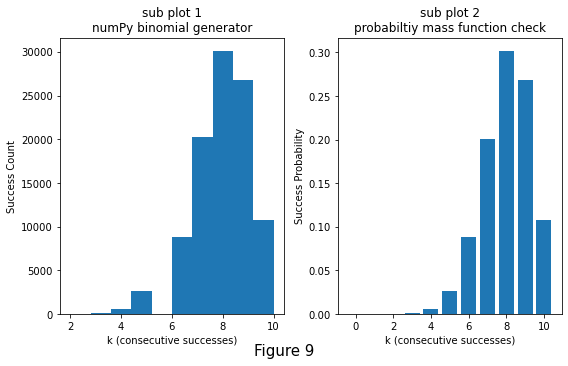

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 5))
plt.figtext(0.5, 0, 'Figure 9', wrap = True, horizontalalignment = 'center', fontsize = 15); 

ax1.hist(binom_array, bins = 10)
ax2.bar(p_check_table['successes'], p_check_table['prob'])

ax1.set_title('sub plot 1\nnumPy binomial generator')
ax1.set_xlabel('k (consecutive successes)')
ax1.set_ylabel('Success Count')

ax2.set_title('sub plot 2\nprobabiltiy mass function check')
ax2.set_xlabel('k (consecutive successes)')
ax2.set_ylabel('Success Probability')
plt.tight_layout()


# description for plot
string_spacer = [' ' * 11 for i in range(12)]
print('\n{}Trials = 10 for both sub plots, probability of success in each trial\n\
{}is 80 %. Sub plot 1 used numPys binomial function to generate an\n\
{}array of trial success counts. Sub plot 2 applied the probability\n\
{}mass function to the trial range to return the probability of\n\
{}success for each trial. The probabilites shown in sub plot 2 align\n\
{}with results obtained in subplot 1, where trials with the highest\n\
{}probability of success did succeed more.\n'.format(*string_spacer))

<br>

##### Modelling Real World Data
Hessing, 2019 describes how any real world scenario's can be modelled if they obey the following criteria: 

The model must have:
1. Fixed trials that can not be altered during course of analysis
2. Independent trials where results from one trial will not effect result of another trial
3. Fixed probability of success accross all trials
4. Two mutually exclusive outcomes for each trial


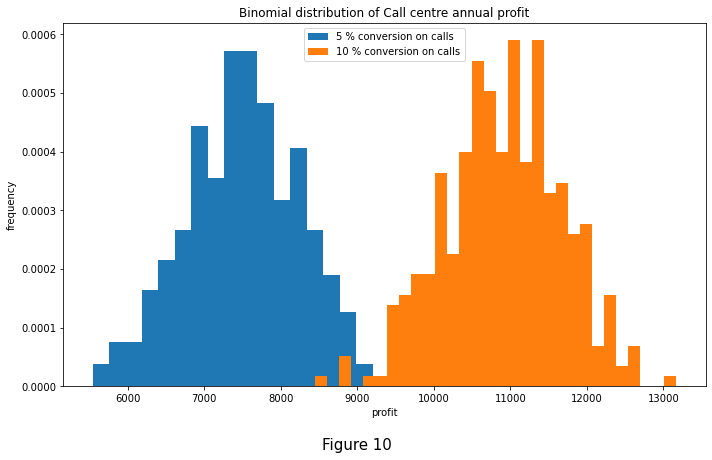

In [21]:
# Call Center Simulation to model projected profit probabilities when altering call conversion rates
# adopted from: https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b
def model_call_centre(p):
    staff_count = 100
    daily_wage = 100      
    daily_call_count = 100     # Number of  calls per employee      
    revenue_per_call = 35
    

    # Binomial random variables of call center employees
    array = [np.sum(rng.binomial(daily_call_count, p, size = staff_count)) for i in range(366)] 
    profit = np.array(array)*revenue_per_call - staff_count * daily_wage
    return profit

call_centre_worse = model_call_centre(p = 0.05)    
call_centre_better = model_call_centre(p = 0.06)   

Fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(call_centre_worse, bins = 20,  label = "5 % conversion on calls", density = True) 
ax.hist(call_centre_better, bins = 30, label = "10 % conversion on calls", density = True) 
plt.figtext(0.5, -0.05, 'Figure 10', wrap = True, horizontalalignment = 'center', fontsize = 15); 
ax.title.set_text('Binomial distribution of Call centre annual profit')
ax.set_xlabel('profit')
ax.set_ylabel('frequency')
plt.legend()
plt.tight_layout();


#### Hypergeometric distribution
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.hypergeometric.html) <br>

##### Function Usage
*Syntax: random.Generator.normal(ngood, nbad, nsample, size=None)* <br>

This function draws random samples from a Hypergeometric  distribution. It accepts 4 parameters:
- *ngood*: number of ways one can make a good selection.
- *nbad*: number of ways one can make a bad selection.
- *nsample*: number of items to be sampled (no larger than ngood + nbad).
- *size*: shape of output array (number of dimensions * number of samples drawn (exclusive))

##### Distribution Description

This is a discrete distribution that is very similar to the binomial distribution, but it doesnt measure the probability of a single success. A binomial experiment requires that the probability<br>
of success be constant on every trial, whearas the hypergeometric model alteres the probability by removing the sample from the population on in successive trials [17].

As demonstrated in *Figure 11* below the shape of the distribution resemble the normal distribtion without the skew of the binomial, this is again due to the binomial distribution<br>
re-sampling on successive trials. One can also see an increase in the mean of the distribution as the number of success possibilities and the number of samples taken from the population<br>
increases.

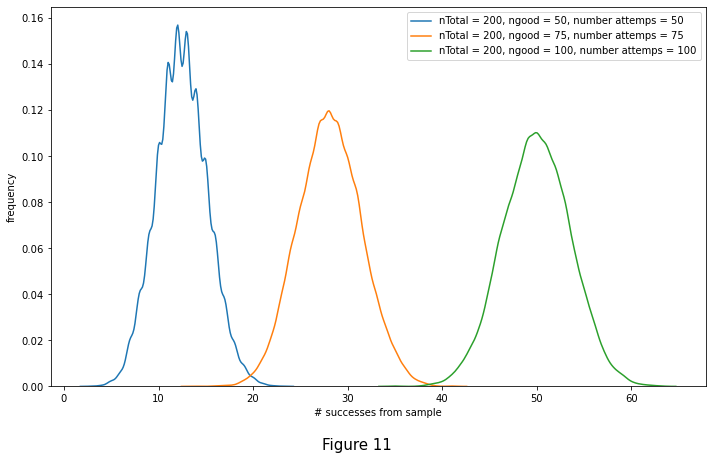

In [22]:
import seaborn as sns
testArray = rng.hypergeometric((50, 75, 100), (150, 125, 100), (50, 75, 100), (10000, 3))
df = pd.DataFrame(testArray, columns = ['low', 'medium', 'high'])

fig, ax = plt.subplots(figsize = (10, 6))
plt.figtext(0.5, -0.05, 'Figure 11', wrap = True, horizontalalignment = 'center', fontsize = 15)
sns.kdeplot(data = df, x = 'low', ax=ax, label = 'nTotal = 200, ngood = 50, number attemps = 50')
sns.kdeplot(data = df, x = 'medium',ax=ax, label = 'nTotal = 200, ngood = 75, number attemps = 75')
sns.kdeplot(data = df, x = 'high', ax=ax, label = 'nTotal = 200, ngood = 100, number attemps = 100')

ax.set_xlabel('# successes from sample')
ax.set_ylabel('frequency')

for plot_index, ax in enumerate(fig.axes):  
    ax.legend()
    
plt.tight_layout()

##### Probability Mass Function

<h3>$P(x)=\frac{\binom{ngood}{x}\binom{b}{n - x}}{\binom{ngood + b}{n}}$ <h3>


                            Parameters for both sub plots:
           Total outcomes = 20, good outcomes = 7, bad outcomes = 13
           Total attempts at success = 12, model to be ran 10000 times.

           Subplot 1 used numPy hypergeometric function to generate an array
           of trail success counts. Sub plot 2 applied the probability
           mass function to the trial range to return the probability of
           success for each trial. The probabilites shown in sub plot 2 align
           with results obtained in subplot 1, where trials with the highest
           probability of success did succeed more.



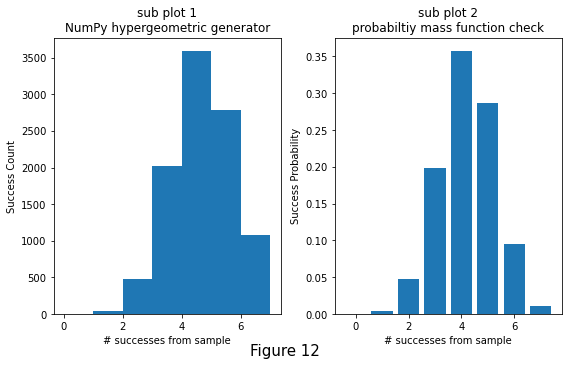

In [23]:
# test the numPy binomial function vs. probability mass function
from scipy.stats import hypergeom

# M = total object count, n = ngood
# N = number of target drawn from total population  without replacement

[M, n, N] = [20, 7, 12]
rv_object = hypergeom(M, n, N)                       # generate hypergeom object using relevant parmaeters
ngood_array = np.arange(0, n+1)                      # generate array for total number of good objects
probability = rv_object.pmf(ngood_array)             # call probability mass function on hypergeom object

hyperg_array = rng.hypergeometric(7, 13, 12, 10000)  # generate equivalent hyperg array using numpy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 5))
plt.figtext(0.5, 0, 'Figure 12', wrap = True, horizontalalignment = 'center', fontsize = 15); 

ax1.hist(hyperg_array, bins = 7)                    # plot subpot 1, numpy hist
ax2.bar(ngood_array, probability)                    # plot subpot 2, probability comparison bar

ax1.set_title('sub plot 1\nNumPy hypergeometric generator')
ax1.set_xlabel('# successes from sample')
ax1.set_ylabel('Success Count')

ax2.set_title('sub plot 2\nprobabiltiy mass function check')
ax2.set_xlabel('# successes from sample')
ax2.set_ylabel('Success Probability')
plt.tight_layout();

# description for plot
string_spacer = [' ' * 11 for i in range(12)]
print('\n{}                 Parameters for both sub plots:\n\
{}Total outcomes = 20, good outcomes = 7, bad outcomes = 13\n\
{}Total attempts at success = 12, model to be ran 10000 times.\n\n\
{}Subplot 1 used numPy hypergeometric function to generate an array\n\
{}of trail success counts. Sub plot 2 applied the probability\n\
{}mass function to the trial range to return the probability of\n\
{}success for each trial. The probabilites shown in sub plot 2 align\n\
{}with results obtained in subplot 1, where trials with the highest\n\
{}probability of success did succeed more.\n'.format(*string_spacer))

##### Modelling Real World Data

Researching this distribution showed that one can see model real world scenarios that obey the follow criteria: <br>
The scenario must have; 
- Fixed number of trials or sampling events (discrete distribution).
- Two mutually exclusive outcomes for each trial (ngood and nbad)  
- Sample size is a portion of the population. 
- Altering probability of success for sucessive trials (as no re-sampling occurs) 

In [24]:
# game scenario: texas holdem: 1 player***********************************************
# model success count for multiple hands in a game of straight poker (1 player)
'''
# hand 1:  10, J, Q, K, Ace in same suit  (royal flush)
ngood_royal_flush = 5        
nbad_royal_flush = 52 - ngood_royal_flush

# hand 2:  x4 cards of same value (poker)
ngood_poker = x             
nbad_poker = ngood_poker - x          

# hand 3:  3 of a kind & 2 pair (full house)
ngood_full_house = x         
nbad_full_house = x         

# hand 4:  x5 cards of same suit (straight)
ngood_straight = x           
nbad_straight = x         

# hand 5:  x3 cards of same value (three of a kind)
ngood_three_kind = x         
nbad_three_kind = x          
'''


nsample = 2
nruns = (1000, 3)

ngood_royal_flush = 1                                   
nbad_royal_flush = 52 - ngood_royal_flush - 5           

ngood_normal_flush = (52 / 4) - 4                        
nbad_normal_flush = 52 - ngood_normal_flush - 5

ngood_run = 4                                            
nbad_run  = (52 - 4) - 5  

all_hands = rng.hypergeometric((ngood_royal_flush, ngood_normal_flush, ngood_run), 
                                 (nbad_royal_flush, nbad_normal_flush, nbad_run) , 
                                 (nsample), nruns)
import pandas as pd 
import seaborn as sns

'''
x_axis = np.arange(nsample + 1)
test1 = return_counts(all_hands[:,0])
test2 = return_counts(all_hands[:,1])
test3 = return_counts(all_hands[:,2])
'''

df = pd.DataFrame(all_hands, columns = ['rf', 'f', 'r'])
#hand1 = df.value_counts()
#hand2 = df['f'].value_counts()
#hand3 = df['r'].value_counts()

#hand1['hand'] = 'rf'
#hand2['hand'] = 'f'
#hand3['hand'] = 'r'
#print(hand1)
#print(hand2)
#print(hand3)
#potential_bar = sns.catplot(data = df, kind = "bar", x = "species", y = "body_mass_g", hue= "sex", ci = "sd", palette = "dark", alpha= 0.6, height=6)


for idx,name in enumerate(df['f'].value_counts().index.tolist()):
    print('Name :', name)
    print('Counts :', df['f'].value_counts()[idx])

#output 
'''
type	success count	value
rf         	0	          3
f	        0	          4
r	        0	          2
rf	        1	          3  
f	        1	          2   
r	        1	          2    
		
''';

Name : 0
Counts : 657
Name : 1
Counts : 310
Name : 2
Counts : 33


#### Poisson distribution
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html) <br>

##### Function Usage
*Syntax: random.Generator.poisson(lam=1.0, size=None)* <br>

This function draws random samples from a poisson  distribution. It accepts 4 parameters:
- *lam*: Projected events to occur across fixed-time intervals (> 0).
- *size*: shape of output array (number of dimensions * number of samples drawn (exclusive)).<br>

##### Function Usage
*Syntax: random.Generator.poisson(lam=1.0, size=None)* <br>

This function draws random samples from a poisson  distribution. It accepts 4 parameters:
- *lam*: Projected events to occur across fixed-time intervals (> 0).
- *size*: shape of output array (number of dimensions * number of samples drawn (exclusive)).<br>
This is a discrete distribution that models the probability of the number events occuring occurs in fixed interals (usually time). Koehrsen, 2020 describes the poisson process as a model for<br>
a series of discrete events where the average time between events is known, however the exact timing of the events are random. 

As demonstrated in Figure 13 below the shape of the Poisson distribution changes with the lamda (λ) value. A distribution with a low λ becomes positively skewed as the mode and mean approach zero,<br>
while the distirubtion with a higher λ resembles that of a normal distribution. It was also observed that when the binomial distirbution has a large number of trials and low probability of success<br>
(ref Fig. X) one can compare the distribution to that of the poisson for medium and larger λ values. This similarity can be explained when one expores how the poisson disribution has an unlimited<br>
number of outcomes, whearas the binomial has only two possible outcomes.


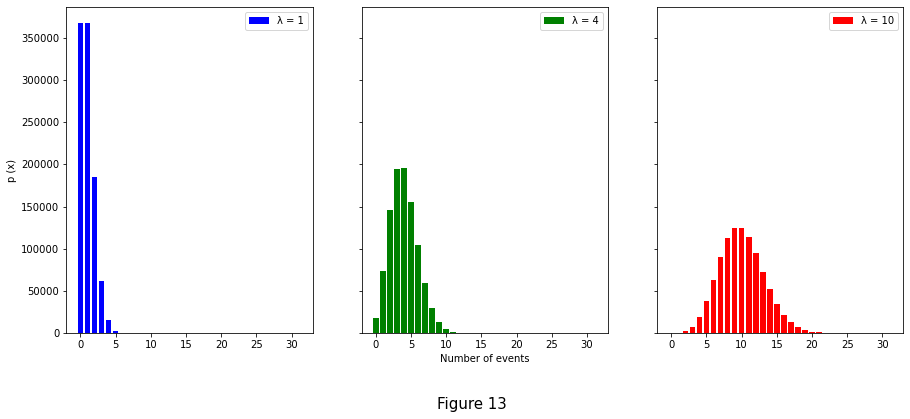

In [25]:

multi_array = rng.poisson(lam = (1, 4, 10), size=(1000000, 3))

array_low = multi_array[:,0]
array_medium = multi_array[:,1]
array_high = multi_array[:,2]

unique_low, counts_low = np.unique(array_low, return_counts=True)
unique_medium, counts_medium = np.unique(array_medium, return_counts=True)
unique_high, counts_high = np.unique(array_high, return_counts=True)


fig, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (15, 6))
plt.figtext(0.5, -0.05, 'Figure 13', wrap = True, horizontalalignment = 'center', fontsize = 15)

ax[0].bar(unique_low, counts_low, label = 'λ = 1', color = 'blue')
ax[1].bar(unique_medium, counts_medium, label = 'λ = 4', color = 'green')
ax[2].bar(unique_high, counts_high, label = 'λ = 10', color = 'red')
ax[0].set_ylabel('p (x)')  
ax[1].set_xlabel('Number of events')   

for plot_index, ax in enumerate(fig.axes):  
    ax.legend()

##### Probability Density Function
<h2>&nbsp;  $f(k;λ)=\frac{λ^ke^-λ}{k!}$ <h2>


           Subplot 1 used numPys poisson function to model the expected number of events
           applied occuring in a fixed time period (with the mean of distrubtion at 5).
           Subplot 2 uses probability mass function to obtain the probability of n events 
           occuring in a fixed time period when the mean events occuring is also 5. The 
           probabilites shown in sub plot 2 align with results obtained in subplot 1, see 
           calc. in red for probability of 3 successes



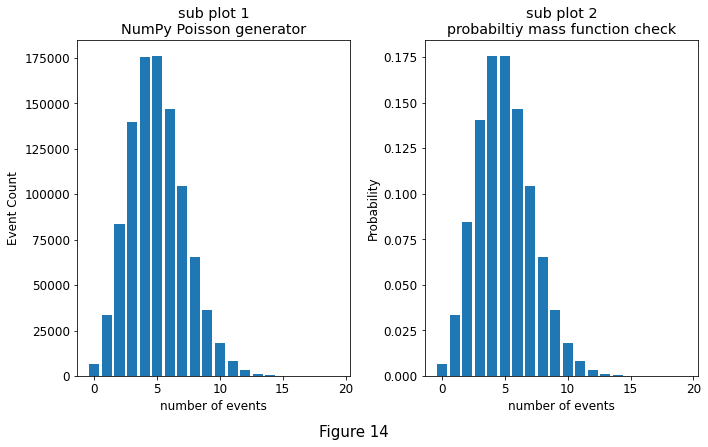

In [26]:
# generate poisson array using numPy 
# expected num events in fixeed time interval = 5

array = rng.poisson(lam = (5), size = (1000000, 1))
num_events_numpy, event_count = np.unique(array, return_counts = True)

# implement probability mass function to describe probability
# of obtaining k successes during given time interval
from scipy.stats import poisson

mu = 5       # mean numb successes that occur during a specific interval                  

num_events_scipy = {'number of events': list(range(0, len(num_events_numpy)))}    # make dict for event number range
p_check_table = pd.DataFrame(num_events_scipy)                                    # generate table from dict
prob = lambda x:poisson.pmf(x, mu)                                                # define lamda function to apply pmf
p_check_table['prob'] = p_check_table['number of events'].apply(prob)             # apply pmf to numb event column


plt.rcParams.update({'font.size': 12})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
plt.figtext(0.5, -0.025, 'Figure 14', wrap = True, horizontalalignment = 'center', fontsize = 15); 

ax1.bar(num_events_numpy, event_count)
ax2.bar(p_check_table['number of events'], p_check_table['prob'])   
ax1.set_title('sub plot 1\nNumPy Poisson generator')
ax1.set_xlabel('number of events')
ax1.set_ylabel('Event Count')
ax2.set_title('sub plot 2\nprobabiltiy mass function check')
ax2.set_xlabel('number of events')
ax2.set_ylabel('Probability')
plt.tight_layout();


#prob_check_subplot1 = 'prob. of 3 events\nwhen mean is 5\n140000 / 10^6\n = {}'.format(140000 / 1000000)
#prob_check_subplot2 = 'prob. of 3 events\nwhen mean is 5\n = {}'.format(round(poisson.pmf(3, 5), 3))
#ax1.text(0.0, 0.975, prob_check_subplot1, ha='center', va='center', transform=ax.transAxes, color = 'red')
#ax2.text(0.99, 1, prob_check_subplot2, ha='center', va='center', transform=ax.transAxes, color = 'red')


# description for plot
string_spacer = [' ' * 11 for i in range(12)]
print('\n{}Subplot 1 used numPys poisson function to model the expected number of events\n\
{}applied occuring in a fixed time period (with the mean of distrubtion at 5).\n\
{}Subplot 2 uses probability mass function to obtain the probability of n events \n\
{}occuring in a fixed time period when the mean events occuring is also 5. The \n\
{}probabilites shown in sub plot 2 align with results obtained in subplot 1, see \n\
{}calc. in red for probability of 3 successes\n'.format(*string_spacer))

##### Modelling Real World Data
The Possion destribution has many real world applications. The model is used in probabilistic machine learning models such as the Genralized Linear model which is<br>
essentially a flexible version of the linear regression model [20]. The distribution can also help model many complex system over fixed time periods, such as weather<br>
events, network failures and website visitors per hour. 

Raji, 2021 described the needed criteria to apply the model:
- The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
- The average rate at which events occur is constant, i.e events per time period are constant.
- Two events cant occur at exactly the same time interval, if this is false one may be able to use the binomial distribution. 

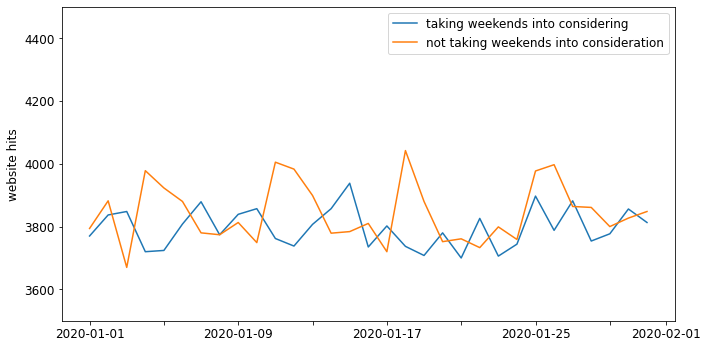

In [99]:
# scenario:

# Company noticed an increase in mean website hits during weekend (from 3800 to 4000)
# They used the poisson distribution from numPy to model daily data.
   
mean_week_hits = 3800
mean_weekday_hits = 3800
mean_weekend_hits = 4000


    
date_range = pd.date_range('1/1/2020', periods = 31, freq = 'D')
weekdays = date_range[date_range.dayofweek < 5]
weekends = date_range[date_range.dayofweek > 4]


df_all_days = pd.DataFrame(rng.poisson(mean_week_hits, len(date_range)), index = date_range, columns=['website hits'])
df_weekday = pd.DataFrame(rng.poisson(mean_weekday_hits, len(weekdays)), index = weekdays, columns=['website hits'])
df_weekend = pd.DataFrame(rng.poisson(mean_weekend_hits, len(weekends)), index = weekends, columns=['website hits'])

frames = [df_weekday, df_weekend]
df_joined =  pd.concat(frames)
df_joined.sort_index()

fig , ax = plt.subplots(figsize = (10, 5))
sns.lineplot(data = df_all_days, x = df_all_days.index, y = "website hits", label = 'taking weekends into considering')
sns.lineplot(data = df_joined, x = df_joined.index, y = "website hits", label = 'not taking weekends into consideration')
 
ax.set_ylim([3500, 4500])
ax.legend()
    
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 2 != 0:
        label.set_visible(False)
plt.tight_layout()

<br>

### Seeding

### References

[1]. Tutorialspoint, 2021, NumPy Tutorial, Available at: https://www.tutorialspoint.com/numpy/index.htm (Accessed: 21 October 2021).<br>

<br> 

[2]. Soklaski, R, 2020, “Vectorized” Operations: Optimized Computations on NumPy Arrays, Available at:<br> https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html# (Accessed: 21 October 2021).<br>

<br> 

[3]. Mahto, P, 2020, NumPy For Machine Learning, Available at: https://medium.com/mlpoint/numpy-for-machine-learning-211a3e58b574<br>
(Accessed: 26 October 2021).<br>

<br>

[4]. Bertoldi, D, 2019, Building a Pseudorandom Number Generator, Available at: https://www.tutorialspoint.com/numpy/index.htm<br>
 (Accessed: 26 October 2021).<br>
 
<br>
 
[5]. Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362. <br>

<br>
 
[6]  Sarkar, T, 2020, How to generate random variables from scratch, Available at:<br>
https://towardsdatascience.com/how-to-generate-random-variables-from-scratch-no-library-used-4b71eb3c8dc7 (Accessed: 27 October 2021). <br>


<br>

[7]. Menon, V, 2021, Understanding Probability Distribution, Available at: https://medium.com/swlh/understanding-probability-distribution-b5c041f5d564<br>
(Accessed: 02 November 2021).

<br>


[8].Mishchenko, Y, 2020, Bootstrapping vs. Permutation Testing, Available at:<br>
https://towardsdatascience.com/tagged/permutations?p=46604da34882 (Accessed: 09 November 2021).<br>

<br>

[9].  Calomme, V, 2017 , Why should the data be shuffled for machine learning tasks, StackExchange, Available at:<br>
 https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks/24524#24524 <br>
 (Accessed: 09 October 2021).<br>
<br>

[10].Billiau, S, 2021, From Scratch: Permutation Feature Importance for ML Interpretability, towards data science, available at:<br>
https://towardsdatascience.com/from-scratch-permutation-feature-importance-for-ml-interpretability-b60f7d5d1fe9<br>
(Accessed: 09 October 2021).<br>

<br>

[11]. Sharma, R, 2019, Gaussian distribution, Available at:<br>
https://medium.com/ai-techsystems/gaussian-distribution-why-is-it-important-in-data-science-and-machine-learning-9adbe0e5f8ac<br>
(Accessed 31 March 2021)<br>

<br>

[12]. Barai, A, 2020, Normal Distribution and Machine Learning, Available at:<br>
https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070,<br>
(Accessed 10 November 2021).

<br>


[13]. Brooks-Bartlett, J, 2018, What is a probability distribution?, Available at: <br>
https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc<br>
(Accessed 12 November 2021).

<br>

[14]. Onnen, H, 2021, Python Scenario Analysis: Modeling Expert Estimates with the beta-PERT Distribution, towards data science, Available at: <br>
https://towardsdatascience.com/tagged/probability-distributions?p=22a5e90cfa79<br>
(Accessed 12 November 2021)


<br>


[15]. GADAADHAARIGEEK, 2019, What is a Normal (or Gaussian) Distribution?, kaggle.com,<br> 
Available at: https://www.kaggle.com/gadaadhaarigeek/normal-distribution<br>
(Accessed 12 November 2021).

<br>


[16]. Peng, T, 2020, Bernoulli and Binomial Distributions Explained, Available at: <br>
https://towardsdatascience.com/tagged/binomial-distribution
(Accessed: 14 November 2021)


<br>

[17]. Hessing, T, 2019, When Would You Use Binomial Distribution?, Available at:<br>
https://sixsigmastudyguide.com/binomial-distribution/ (Accessed 14 November 2021)

<br>

[18]. John DeJesus, J, 2019, Hypergeometric Distribution Explained With Python, towards data science, Available at: <br>
https://towardsdatascience.com/hypergeometric-distribution-explained-with-python-2c80bc613bf4<br>
(Accessed: 16 November 2021)


<br>

[19]. Will Koehrsen, W, 2019, The Poisson Distribution and Poisson Process Explained, Poisson Process, towards data science, Available at:<br>
https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459<br>
(Accessed 18 November 2021)


<br>

[20]. Bento, C, 2021, oisson Process and Poisson Distribution in Real-Life, towards data science , Available at:<br>
https://towardsdatascience.com/poisson-process-and-poisson-distribution-in-real-life-modeling-peak-times-at-an-ice-cream-shop-b61b74fb812<br>
(Accessed 18 November 2021).


<br>

[21]. Raji, M, 2020, The Poisson Distribution, Assumptions and validity, medium.com, Availaible at:<br>
https://medium.com/analytics-vidhya/the-poisson-distribution-a061b0cd0221<br>
(Accessed 19 Nov 2021)


<br>



<br>


<br>
<br>
<br>
<br>
<br>


Bit generator:<br>
https://bashtage.github.io/randomgen/custom-bit-generators.html<br>
https://towardsdatascience.com/before-probability-distributions-d8a2f36b1cb<br>

# extra
numpy behind the scenes in machine learning

use cases distributions : https://towardsdatascience.com/deep-diving-statistical-distributions-with-python-for-data-scientists-a0a4badc8d1a

(365, 6)

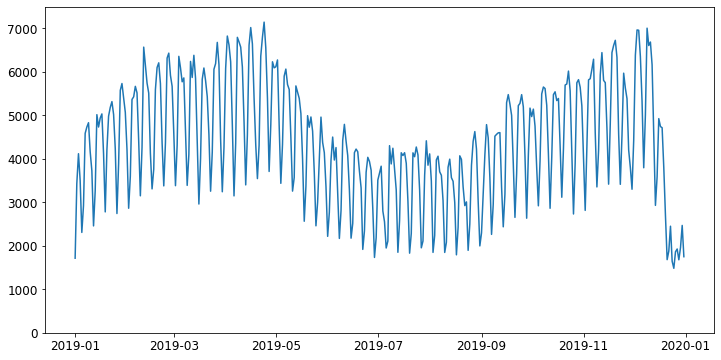

In [49]:
# dataset got 'here https://www.kaggle.com/bobnau/daily-website-visitors'
read_path = 'numpy_data_sets/daily-website-visitors.csv'
df = pd.read_csv(read_path)

dfDate = df['Date']
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

mask = (df.index >= '2019-01-01') & (df.index <= '2019-12-31')
df = df.loc[mask]

reformat_cols = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
df[reformat_cols] = df[reformat_cols].stack().str.replace(',','').unstack()
df[reformat_cols] = df[reformat_cols].apply(pd.to_numeric, errors = 'coerce')
df = df.resample('D').mean()

fig , ax = plt.subplots(figsize = (12, 6))
ax.set_ylim([0, 7500])
plt.plot(df.index, df['Page.Loads'])
df.shape

#df.to_csv('test')

4345.380821917808


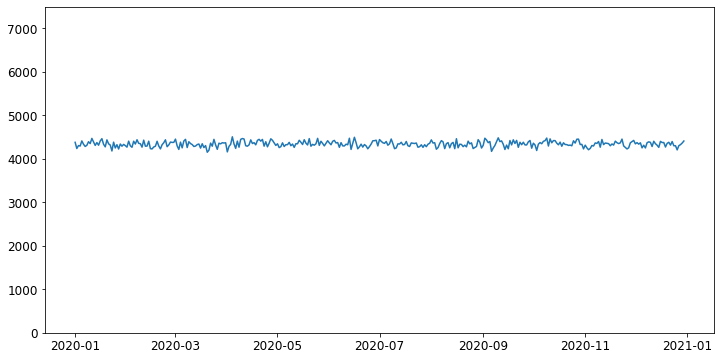

In [50]:
# adapted from https://pandas.pydata.org/pandas-docs/stable/timeseries.html

mean_page_hits = df['Page.Loads'].mean()
print(mean_page_hits)

rng = pd.date_range('1/1/2020', periods = 365, freq = 'D')
df_poisson = pd.DataFrame(np.random.poisson(mean_page_hits, len(rng)), index = rng, columns=['test'])
df_poisson

fig , ax = plt.subplots(figsize = (12, 6))
ax.set_ylim([0, 7500])
plt.plot(rng, df_poisson)


later 




<br>

#### discuss this part later (mabye compare old to new?)
The new infrastructure takes a different approach to producing random numbers from the RandomState object. 
Random number generation is separated into two components, a bit generator and a random generator.



The BitGenerator has a limited set of responsibilities. It manages state and provides functions to produce random doubles and random unsigned 32- and 64-bit values.

BitGenerators: Objects that generate random numbers. These are typically unsigned integer words filled with sequences of either 32 or 64 random bits.


Simply speaking, a generator is a function that returns an object (iterator) which we can iterate over (one value at a time).


<br>
*class numpy.random.Generator(bit_generator)*


\begin{align}
Equation :  && P(x)=\frac{\binom{ngood}{x}\binom{b}{n - x}}{\binom{ngood + b}{n}} && P(2)=\frac{\binom{13}{2}\binom{52-13}{5-2}}{\binom{52}{5}}
\end{align}

### useful chart link
https://www.highcharts.com/

# to do<br>
Function Usage on first 4 distributions<br>
size: shape of output array (number of samples drawn, number of dimensions).<br>

<br>
<br>
<br>
<br>
<br>